In [8]:
import time
import numpy as np
from art.classifiers import SklearnClassifier
from art.utils import load_mnist
from art.attacks.evasion import BoundaryAttack
from sklearn.svm import SVC

In [2]:
# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(min_pixel_value, max_pixel_value)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
0.0 1.0


In [3]:
since = time.time()
model = SVC()
model.fit(x_train.reshape((len(x_train), -1)), y_train)
time_elapsed = time.time() - since
print('Time taken for {}: {:2.0f}m {:3.1f}s'.format('training classifier', time_elapsed//60, time_elapsed%60))

Time taken for training classifier:  4m 59.0s


In [5]:
model.score(x_test.reshape((len(x_test), -1)), y_test)

0.9792

In [12]:
classifier = SklearnClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value))
attack = BoundaryAttack(estimator=classifier, targeted=False, max_iter=500, num_trial=10)

In [19]:
n = 10
x_clean = x_test.reshape((len(x_test), -1))[:n]
y_true = y_test[:n]

since = time.time()
adv = attack.generate(x=x_clean)
time_elapsed = time.time() - since
print('Time taken for {}: {:2.0f}m {:3.1f}s'.format('generating adv examples', time_elapsed//60, time_elapsed%60))

Boundary attack: 100%|██████████| 10/10 [16:38<00:00, 99.89s/it] 

Time taken for generating adv examples: 16m 39.2s


In [20]:
predictions = np.argmax(classifier.predict(adv), axis=1)
acc = np.sum(predictions == model.predict(x_clean)) / len(x_clean)
acc

0.0

In [21]:
np.save('adv.npy', adv.astype(np.float32), allow_pickle=False)
np.save('x_clean.npy', x_clean.astype(np.float32), allow_pickle=False)
np.save('y_true.npy', y_true.astype(np.float32), allow_pickle=False)

In [22]:
adv = np.load('adv.npy', allow_pickle=False)
x_clean = np.load('x_clean.npy', allow_pickle=False)
y_true = np.load('y_true.npy', allow_pickle=False)

In [24]:
print(y_true)

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


In [25]:
import matplotlib.pyplot as plt

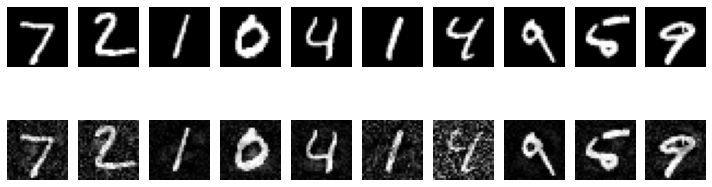

In [34]:
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, 10, 1+i)
    plt.imshow(X=x_clean[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, 10, 11+i)
    plt.imshow(adv[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()